In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os

# import APi key, or not. 
api_key = "2846a361555400ec74653ae3529a8ccf"

#incorporated citipy to determine city based on latitude and longitude 
from citipy import citipy

#Output file (csv)

output_data_file = "output_data/cities.csv"

lat_range = (-90,90)
lng_range = (180, 180)


In [37]:
lat_lngs = []
cities = []

#create a set of random lat and lng combinations
lats = np.random.uniform(low = -90.000, high = 90.000, size = 1500)
lngs = np.random.uniform(low = -90.000, high = 90.000, size = 1500)
#combine the two lists 
lat_lngs = zip(lats,lngs)
#Identify neaerest cities 

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0],lat_lng[1]).city_name
    
    #if city is unque add it to city list. 
    if city not in cities:
        cities.append(city)

len(cities)



625

In [38]:
# refere to 1.10 for a loop fundtion. 
# refer to the 2.extra content for good function. 
# get basic URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metrics"

In [39]:
# load up the quuary code
query_url = f"{url}appid={api_key}&units={units}&q="

In [40]:
# go through the query to reireive lists of cities and there respective values
#make our range for lats
lats= []
max_tempeture = []
city_names = []
cloudiness_data = []
country_data = []
date_data = []
humidty_data = []
lngs = []
wind_data = []
i = 1
# our loop through 
for city in cities:
    try:
        #run each city through the API
        response = requests.get(query_url + city).json()
        #get the values for the the arays
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_tempeture.append(response['main']['temp_max'])
        cloudiness_data.append(response['clouds']['all'])
        country_data.append(response['sys']['country'])
        date_data.append(response['dt'])
        humidty_data.append(response['main']['humidity'])
        wind_data.append(response['wind']['speed'])
        city_names.append(city)
        print(f"Processsing record {i} | {city}" )
        i = i + 1   
    except KeyError:
        print("Oops, that City doesn't exist.")
    

Processsing record 1 | aparecida do taboado
Processsing record 2 | hambantota
Processsing record 3 | ponta do sol
Processsing record 4 | navahrudak
Processsing record 5 | cape town
Processsing record 6 | necochea
Processsing record 7 | kavaratti
Processsing record 8 | kita
Oops, that City doesn't exist.
Processsing record 9 | quatre cocos
Processsing record 10 | elat
Processsing record 11 | kibaya
Oops, that City doesn't exist.
Processsing record 12 | hithadhoo
Processsing record 13 | port alfred
Processsing record 14 | upernavik
Processsing record 15 | cacoal
Processsing record 16 | tigre
Processsing record 17 | bredasdorp
Processsing record 18 | gat
Processsing record 19 | ushuaia
Processsing record 20 | vestmanna
Oops, that City doesn't exist.
Processsing record 21 | narsaq
Oops, that City doesn't exist.
Processsing record 22 | hermanus
Processsing record 23 | lira
Processsing record 24 | iqaluit
Processsing record 25 | lagoa
Processsing record 26 | winneba
Oops, that City doesn't e

Processsing record 219 | shiraz
Processsing record 220 | storrs
Processsing record 221 | sinnamary
Processsing record 222 | wilmington
Processsing record 223 | bilma
Processsing record 224 | luanda
Processsing record 225 | santiago del estero
Processsing record 226 | lokosovo
Processsing record 227 | cap malheureux
Processsing record 228 | maloyaroslavets
Processsing record 229 | antalaha
Processsing record 230 | arlit
Processsing record 231 | belen
Processsing record 232 | bay roberts
Processsing record 233 | mahasamund
Processsing record 234 | karema
Processsing record 235 | woodhaven
Processsing record 236 | wooster
Processsing record 237 | beisfjord
Oops, that City doesn't exist.
Processsing record 238 | persianovskiy
Processsing record 239 | isla mujeres
Processsing record 240 | mikhaylov
Processsing record 241 | rorvik
Processsing record 242 | ibra
Processsing record 243 | bubaque
Processsing record 244 | solhan
Processsing record 245 | mattru
Processsing record 246 | salta
Proce

Processsing record 438 | talnakh
Processsing record 439 | yazman
Processsing record 440 | san jose
Processsing record 441 | baghdad
Processsing record 442 | san ramon
Processsing record 443 | rakitnoye
Processsing record 444 | kalmunai
Processsing record 445 | la macarena
Processsing record 446 | black river
Processsing record 447 | igrim
Oops, that City doesn't exist.
Processsing record 448 | ambilobe
Processsing record 449 | sao sepe
Oops, that City doesn't exist.
Processsing record 450 | ales
Processsing record 451 | fatehabad
Processsing record 452 | talcher
Processsing record 453 | morant bay
Processsing record 454 | de aar
Processsing record 455 | sayyan
Processsing record 456 | semnan
Processsing record 457 | turukhansk
Processsing record 458 | plettenberg bay
Processsing record 459 | ejura
Processsing record 460 | uyuni
Oops, that City doesn't exist.
Oops, that City doesn't exist.
Processsing record 461 | formosa
Processsing record 462 | kyshtovka
Processsing record 463 | la so

In [41]:
# convert kelvi temp to farenhiet
max_tempeture_f = []
for x in max_tempeture:
    max_tempeture_f.append((x-273.15) * (9/5) +32)
    

#create the data frame 
weather_df = pd.DataFrame({
    "City":city_names, 
    "Cloudiness":cloudiness_data,
    "Country":country_data,
    "Date":date_data,
    "Humidity":humidty_data,
    "Latitude":lats,
    "Longitude": lngs,
    "Max Tempature":max_tempeture_f,
    "wind Speed":wind_data})
weather_df.head().head()

    

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Tempature,wind Speed
0,aparecida do taboado,0,BR,1566758450,19,-20.08,-51.10,88.43,1.95
1,hambantota,100,LK,1566758450,82,6.12,81.12,79.79,7.20
2,ponta do sol,0,BR,1566758450,31,-20.63,-46.00,78.53,2.34
3,navahrudak,4,BY,1566758451,82,53.59,25.82,64.49,2.63
4,cape town,75,ZA,1566758183,87,-33.93,18.42,59.00,4.10


In [42]:
city_data_output = os.path.join("cities.csv")
#save the data frame as a .csv
weather_df.to_csv("cities.csv",index=False)

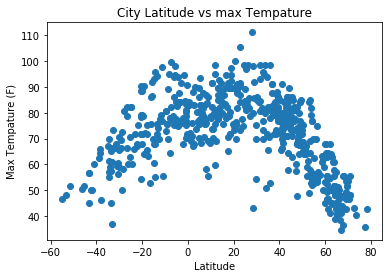

In [43]:
# make graph for Tempature vs Latitude 
plt.scatter(weather_df["Latitude"],weather_df["Max Tempature"])
plt.xlabel("Latitude")
plt.ylabel("Max Tempature (F)")
plt.title("City Latitude vs max Tempature")

#save file to png
scatter_data_output = os.path.join("latvstemp.png")
plt.savefig("latvstemp.png")

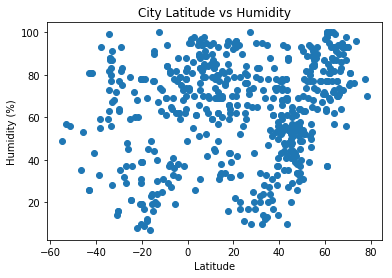

In [44]:
# make a scatter plot for Humidity vs Latitude 
plt.scatter(weather_df["Latitude"],weather_df["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity")

#save file to png
scatter_data_output = os.path.join("latvshumidity.png")
plt.savefig("latvshumidity.png")

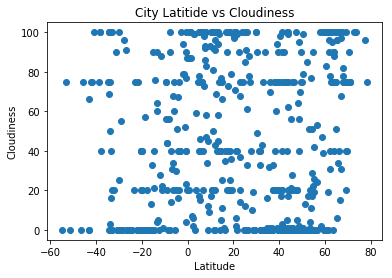

In [45]:
# make a graph for cloudiness vs latitude
plt.scatter(weather_df["Latitude"],weather_df["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("City Latitide vs Cloudiness")

#save file to png
scatter_data_output = os.path.join("latvscloudiness.png")
plt.savefig("latvscloudiness.png")

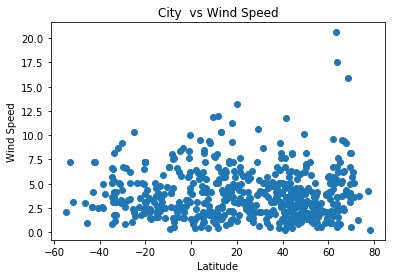

In [46]:
# make a graph for wind speed vs latitude
plt.scatter(weather_df["Latitude"],weather_df["wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("City  vs Wind Speed")

#save file to png
scatter_data_output = os.path.join("latvswindspeed.png")
plt.savefig("latvswindspeed.png")